<a href="https://colab.research.google.com/github/saffarizadeh/LLMs/blob/main/Using_LLMs_via_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://kambizsaffari.com/Logo/College_of_Business.cmyk-hz-lg.png" width="500px"/>

# *Genenrative AI for Business*

# **A Quick Introduction to Using Major LLMs via API**

Instructor: Dr. Kambiz Saffari

---

In [1]:
openai_api_key = ''
claude_api_key = ''
gemini_api_key = ''

In [3]:
import numpy as np
import pandas as pd

## Data

In [4]:
df_original = pd.read_excel('sentiment_10.xlsx')

In [5]:
df = df_original.copy()

In [6]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   10 non-null     object
 1   Sentiment  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [8]:
df.count()

,0
Sentence,10
Sentiment,10


## Text Embeddings

See https://platform.openai.com/

See https://platform.openai.com/docs/overview

See https://platform.openai.com/docs/api-reference/embeddings

In [9]:
from openai import OpenAI

In [10]:
openai_client = OpenAI(api_key=openai_api_key)

In [11]:
def get_embedding(text, model="text-embedding-3-small"):
    text = text.replace("\n", " ")
    return openai_client.embeddings.create(input = [text], model=model)

In [12]:
df.iloc[0,0]

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [13]:
embedding = get_embedding(df.iloc[0,0])

In [14]:
len(embedding.data[0].embedding)

1536

In [15]:
df['embedding'] = df.Sentence.apply(lambda x: get_embedding(x).data[0].embedding)

In [16]:
df['embedding']

,embedding
0,"[-0.00838553812354803, 0.019021013751626015, 0..."
1,"[-0.0320601761341095, -0.06675093621015549, 0...."
2,"[-0.035186756402254105, -0.01733923889696598, ..."
3,"[-0.06345705687999725, 0.003804802894592285, 0..."
4,"[-0.022958790883421898, -0.028019363060593605,..."
5,"[-0.01711326651275158, -0.026516018435359, -0...."
6,"[0.02299782820045948, -0.023288603872060776, 0..."
7,"[0.0475819855928421, -0.011142542585730553, 0...."
8,"[-0.029357511550188065, -0.005771396681666374,..."
9,"[-0.0060629588551819324, 0.003770114155486226,..."


In [17]:
embedding_matrix = np.array(df['embedding'].to_list())

In [18]:
embedding_matrix.shape

(10, 1536)

## Text Similarity

<img src="https://kambizsaffari.com/teaching_materials/Euclidean_vs_Cosine.png" height="400px" width="400px" />

In [19]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [20]:
cosine_similarities = cosine_similarity(embedding_matrix, embedding_matrix)

In [21]:
pd.DataFrame(cosine_similarities)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.132517,0.222583,0.129030,0.202769,0.125561,0.174421,0.211249,0.198334,0.160532
1,0.132517,1.000000,0.178016,0.059525,0.177533,0.394199,0.321776,0.263801,0.147269,0.133944
2,0.222583,0.178016,1.000000,0.174216,0.359757,0.128937,0.201177,0.370462,0.528499,0.290091
3,0.129030,0.059525,0.174216,1.000000,0.339403,0.120547,0.130765,0.137051,0.273070,0.362339
4,0.202769,0.177533,0.359757,0.339403,1.000000,0.207356,0.322359,0.355658,0.392890,0.416588
5,0.125561,0.394199,0.128937,0.120547,0.207356,1.000000,0.348254,0.305159,0.155470,0.145730
6,0.174421,0.321776,0.201177,0.130765,0.322359,0.348254,1.000000,0.378662,0.198467,0.189111
7,0.211249,0.263801,0.370462,0.137051,0.355658,0.305159,0.378662,1.000000,0.340911,0.224512
8,0.198334,0.147269,0.528499,0.273070,0.392890,0.155470,0.198467,0.340911,1.000000,0.302608
9,0.160532,0.133944,0.290091,0.362339,0.416588,0.145730,0.189111,0.224512,0.302608,1.000000


In [22]:
euclidean_dissimilarities = euclidean_distances(embedding_matrix, embedding_matrix)

In [23]:
pd.DataFrame(euclidean_dissimilarities)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.317181,1.246930,1.319826,1.262720,1.322451,1.284974,1.255987,1.266227,1.295737
1,1.317181,0.000000,1.282173,1.371477,1.282550,1.100728,1.164667,1.213424,1.305934,1.316098
2,1.246930,1.282173,0.000000,1.285133,1.131586,1.319896,1.263980,1.122085,0.971083,1.191561
3,1.319826,1.371477,1.285133,0.000000,1.149432,1.326238,1.318510,1.313734,1.205761,1.129302
4,1.262720,1.282550,1.131586,1.149432,0.000000,1.259082,1.164166,1.135202,1.101917,1.080196
5,1.322451,1.100728,1.319896,1.326238,1.259082,0.000000,1.141705,1.178848,1.299638,1.307111
6,1.284974,1.164667,1.263980,1.318510,1.164166,1.141705,0.000000,1.114753,1.266123,1.273491
7,1.255987,1.213424,1.122085,1.313734,1.135202,1.178848,1.114753,0.000000,1.148119,1.245382
8,1.266227,1.305934,0.971083,1.205761,1.101917,1.299638,1.266123,1.148119,0.000000,1.181010
9,1.295737,1.316098,1.191561,1.129302,1.080196,1.307111,1.273491,1.245382,1.181010,0.000000


## Text Clustering

To learn more about k-means clustering, watch: https://www.youtube.com/watch?v=_aWzGGNrcic or https://www.youtube.com/watch?v=4b5d3muPQmA

In [24]:
from sklearn.cluster import KMeans

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(embedding_matrix)
labels = kmeans.labels_
df["Cluster"] = labels

To learn more about TSNE, watch: https://www.youtube.com/watch?v=NEaUSP4YerM

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

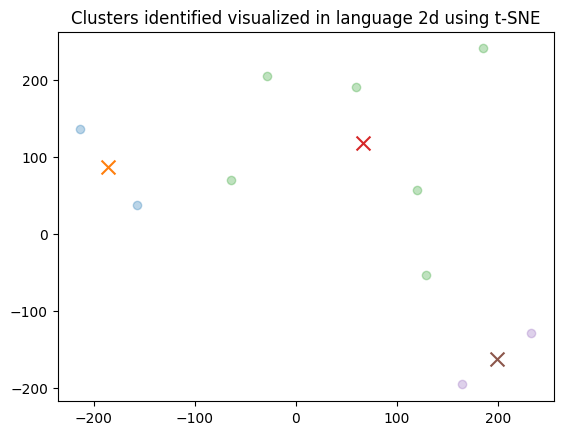

In [25]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=5, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(embedding_matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category in range(n_clusters):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

## Prompting

In [26]:
prompt = f'''
    """
    You are an expert financial sentiment analyst.
    Input: a tweet that may contain a target stock ticker.
    Task: return a single numeric score between –1.0 (extremely negative) and +1.0 (extremely positive), where 0.0 is neutral.
    - Do not include any explanations, labels or punctuation, only the float.
    - Interpret sarcasm, emojis and slang in context.
    - If the tweet conveys no clear sentiment toward the stock, return 0.0.

    """
    '''

## OpenAI GPT Regular Models

See https://platform.openai.com/docs/pricing

Also see https://platform.openai.com/docs/api-reference/chat/create

In [27]:
from openai import OpenAI

In [28]:
openai_client = OpenAI(api_key=openai_api_key)

In [29]:
response = openai_client.chat.completions.create(
    model = "gpt-4.1-2025-04-14",
    messages = [
      {"role": "developer", "content": "You are a helpful assistant."},
      {"role": "user", "content": "Hey! What's up?!"}
    ],
    temperature = 2
)

In [30]:
response

ChatCompletion(id='chatcmpl-BOsd9Pz1GcxIxWWEXZQ390M9eOARm', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Hey! Not much—I'm here to help you with whatever you need. What's up with you?", refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1745269571, model='gpt-4.1-2025-04-14', object='chat.completion', service_tier='default', system_fingerprint='fp_beec22d258', usage=CompletionUsage(completion_tokens=21, prompt_tokens=22, total_tokens=43, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

In [31]:
response.choices[0].message.content

"Hey! Not much—I'm here to help you with whatever you need. What's up with you?"

In [32]:
def evaluate_content_gpt(prompt, content):
  full_prompt = f"{prompt}\n\nTweet:\n{content}"
  response = openai_client.chat.completions.create(
      model="gpt-4.1-2025-04-14",
      messages=[{"role": "user", "content": full_prompt}],
      temperature=0
  )
  return response.choices[0].message.content.strip()

In [33]:
df['gpt_sentiment'] = df.Sentence.apply(lambda x: evaluate_content_gpt(prompt, x))

In [34]:
df['gpt_sentiment'] = df.gpt_sentiment.astype(float)

In [35]:
df

,Sentence,Sentiment,embedding,Cluster,gpt_sentiment
0,The GeoSolutions technology will leverage Bene...,positive,"[-0.00838553812354803, 0.019021013751626015, 0...",1,0.6
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[-0.0320601761341095, -0.06675093621015549, 0....",2,-0.8
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[-0.035186756402254105, -0.01733923889696598, ...",1,0.5
3,According to the Finnish-Russian Chamber of Co...,neutral,"[-0.06345705687999725, 0.003804802894592285, 0...",0,0.0
4,The Swedish buyout firm has sold its remaining...,neutral,"[-0.022958790883421898, -0.028019363060593605,...",1,0.0
5,$SPY wouldn't be surprised to see a green close,positive,"[-0.01711326651275158, -0.026516018435359, -0....",2,0.4
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,"[0.02299782820045948, -0.023288603872060776, 0...",1,-0.4
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,"[0.0475819855928421, -0.011142542585730553, 0....",1,-0.7
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,"[-0.029357511550188065, -0.005771396681666374,...",1,0.6
9,The Stockmann department store will have a tot...,neutral,"[-0.0060629588551819324, 0.003770114155486226,...",0,0.0


## OpenAI GPT Reasoning Models

See https://platform.openai.com/docs/guides/reasoning

In [36]:
from openai import OpenAI

In [37]:
openai_client = OpenAI(api_key=openai_api_key)

In [38]:
def evaluate_content_reasoning(prompt, content):
  full_prompt = f"{prompt}\n\nTweet:\n{content}"
  response = openai_client.chat.completions.create(
      model="o4-mini-2025-04-16",
      messages=[{"role": "user", "content": full_prompt}],
      reasoning_effort = "medium"
  )
  return response.choices[0].message.content.strip()

In [39]:
df['gpt_reasoning_sentiment'] = df.Sentence.apply(lambda x: evaluate_content_reasoning(prompt, x))

In [40]:
df['gpt_reasoning_sentiment'] = df.gpt_reasoning_sentiment.astype(float)

In [41]:
df

,Sentence,Sentiment,embedding,Cluster,gpt_sentiment,gpt_reasoning_sentiment
0,The GeoSolutions technology will leverage Bene...,positive,"[-0.00838553812354803, 0.019021013751626015, 0...",1,0.6,0.3
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[-0.0320601761341095, -0.06675093621015549, 0....",2,-0.8,-1.0
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[-0.035186756402254105, -0.01733923889696598, ...",1,0.5,0.3
3,According to the Finnish-Russian Chamber of Co...,neutral,"[-0.06345705687999725, 0.003804802894592285, 0...",0,0.0,0.0
4,The Swedish buyout firm has sold its remaining...,neutral,"[-0.022958790883421898, -0.028019363060593605,...",1,0.0,0.0
5,$SPY wouldn't be surprised to see a green close,positive,"[-0.01711326651275158, -0.026516018435359, -0....",2,0.4,0.4
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,"[0.02299782820045948, -0.023288603872060776, 0...",1,-0.4,-0.4
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,"[0.0475819855928421, -0.011142542585730553, 0....",1,-0.7,-0.6
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,"[-0.029357511550188065, -0.005771396681666374,...",1,0.6,0.3
9,The Stockmann department store will have a tot...,neutral,"[-0.0060629588551819324, 0.003770114155486226,...",0,0.0,0.0


## Anthropic Claude Models

See https://console.anthropic.com/

See https://www.anthropic.com/pricing#api

See https://docs.anthropic.com/en/api/messages

In [42]:
!pip install anthropic

In [43]:
import anthropic

In [44]:
claude_client = anthropic.Anthropic(api_key=claude_api_key)

In [45]:
response = claude_client.messages.create(
  model = "claude-3-7-sonnet-20250219",
  max_tokens = 1024,
  system = "You are a helpful assistant.",
  messages = [{"role": "user", "content": "Hey! What's up?!"}],
  temperature = 1
)

In [46]:
response

Message(id='msg_01TB7T6MXyjFGro5EaijY1Rk', content=[TextBlock(citations=None, text="Hello there! I'm doing well, thanks for asking! Just here and ready to help with any questions or topics you'd like to discuss. How are you doing today? Is there something specific I can assist you with?", type='text')], model='claude-3-7-sonnet-20250219', role='assistant', stop_reason='end_turn', stop_sequence=None, type='message', usage=Usage(cache_creation_input_tokens=0, cache_read_input_tokens=0, input_tokens=20, output_tokens=48))

In [47]:
response.content[0].text

"Hello there! I'm doing well, thanks for asking! Just here and ready to help with any questions or topics you'd like to discuss. How are you doing today? Is there something specific I can assist you with?"

In [48]:
def evaluate_content_claude(prompt, content):
  full_prompt = f"{prompt}\n\nTweet:\n{content}"
  response = claude_client.messages.create(
    model = "claude-3-7-sonnet-20250219",
    max_tokens = 1024,
    messages = [{"role": "user", "content": full_prompt}],
    temperature = 0
  )
  return response.content[0].text.strip()

In [49]:
df['claude_sentiment'] = df.Sentence.apply(lambda x: evaluate_content_claude(prompt, x))

In [50]:
df['claude_sentiment'] = df.claude_sentiment.astype(float)

In [51]:
df

,Sentence,Sentiment,embedding,Cluster,gpt_sentiment,gpt_reasoning_sentiment,claude_sentiment
0,The GeoSolutions technology will leverage Bene...,positive,"[-0.00838553812354803, 0.019021013751626015, 0...",1,0.6,0.3,0.3
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[-0.0320601761341095, -0.06675093621015549, 0....",2,-0.8,-1.0,-0.8
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[-0.035186756402254105, -0.01733923889696598, ...",1,0.5,0.3,0.3
3,According to the Finnish-Russian Chamber of Co...,neutral,"[-0.06345705687999725, 0.003804802894592285, 0...",0,0.0,0.0,0.0
4,The Swedish buyout firm has sold its remaining...,neutral,"[-0.022958790883421898, -0.028019363060593605,...",1,0.0,0.0,0.0
5,$SPY wouldn't be surprised to see a green close,positive,"[-0.01711326651275158, -0.026516018435359, -0....",2,0.4,0.4,0.3
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,"[0.02299782820045948, -0.023288603872060776, 0...",1,-0.4,-0.4,-0.4
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,"[0.0475819855928421, -0.011142542585730553, 0....",1,-0.7,-0.6,-0.7
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,"[-0.029357511550188065, -0.005771396681666374,...",1,0.6,0.3,0.6
9,The Stockmann department store will have a tot...,neutral,"[-0.0060629588551819324, 0.003770114155486226,...",0,0.0,0.0,0.0


## Google Gemini Models

See https://ai.google.dev/gemini-api/docs

See https://ai.google.dev/gemini-api/docs/text-generation

In [52]:
from google import genai

In [53]:
gemini_client = genai.Client(api_key=gemini_api_key)

In [54]:
response = gemini_client.models.generate_content(
    model = 'gemini-2.5-flash-preview-04-17',
    contents = "Hey! What's up?!",
    config = genai.types.GenerateContentConfig(
        system_instruction = 'You are a helpful assistant.',
        temperature = 2
    )
)

In [55]:
response

GenerateContentResponse(candidates=[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, code_execution_result=None, executable_code=None, file_data=None, function_call=None, function_response=None, inline_data=None, text="Hey there! 👋\n\nAll systems nominal here, just processing data and ready to help! Thanks for asking.\n\nWhat's up with you? What can I assist you with today? 😊")], role='model'), citation_metadata=None, finish_message=None, token_count=None, finish_reason=<FinishReason.STOP: 'STOP'>, avg_logprobs=None, grounding_metadata=None, index=0, logprobs_result=None, safety_ratings=None)], create_time=None, response_id=None, model_version='gemini-2.5-flash-preview-04-17', prompt_feedback=None, usage_metadata=GenerateContentResponseUsageMetadata(cache_tokens_details=None, cached_content_token_count=None, candidates_token_count=907, candidates_tokens_details=None, prompt_token_count=15, prompt_tokens_details=[ModalityTokenCount(modality=<MediaModality.TEXT: '

In [56]:
response.text

"Hey there! 👋\n\nAll systems nominal here, just processing data and ready to help! Thanks for asking.\n\nWhat's up with you? What can I assist you with today? 😊"

In [57]:
def evaluate_content_gemini(prompt, content):
  full_prompt = f"{prompt}\n\nTweet:\n{content}"
  response = gemini_client.models.generate_content(
      model = 'gemini-2.5-pro-preview-03-25',
      contents = full_prompt,
      config = genai.types.GenerateContentConfig(
          temperature = 0
      )
  )
  return response.text.strip()

In [58]:
df['gemini_sentiment'] = df.Sentence.apply(lambda x: evaluate_content_gemini(prompt, x))

In [59]:
df['gemini_sentiment'] = df.gemini_sentiment.astype(float)

In [60]:
df

,Sentence,Sentiment,embedding,Cluster,gpt_sentiment,gpt_reasoning_sentiment,claude_sentiment,gemini_sentiment
0,The GeoSolutions technology will leverage Bene...,positive,"[-0.00838553812354803, 0.019021013751626015, 0...",1,0.6,0.3,0.3,0.65
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[-0.0320601761341095, -0.06675093621015549, 0....",2,-0.8,-1.0,-0.8,-0.80
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[-0.035186756402254105, -0.01733923889696598, ...",1,0.5,0.3,0.3,0.70
3,According to the Finnish-Russian Chamber of Co...,neutral,"[-0.06345705687999725, 0.003804802894592285, 0...",0,0.0,0.0,0.0,0.00
4,The Swedish buyout firm has sold its remaining...,neutral,"[-0.022958790883421898, -0.028019363060593605,...",1,0.0,0.0,0.0,0.00
5,$SPY wouldn't be surprised to see a green close,positive,"[-0.01711326651275158, -0.026516018435359, -0....",2,0.4,0.4,0.3,0.40
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,"[0.02299782820045948, -0.023288603872060776, 0...",1,-0.4,-0.4,-0.4,-0.40
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,"[0.0475819855928421, -0.011142542585730553, 0....",1,-0.7,-0.6,-0.7,-0.70
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,"[-0.029357511550188065, -0.005771396681666374,...",1,0.6,0.3,0.6,0.70
9,The Stockmann department store will have a tot...,neutral,"[-0.0060629588551819324, 0.003770114155486226,...",0,0.0,0.0,0.0,0.00


## Save Results

In [62]:
df.to_excel('Results.xlsx', index=False)